In [2]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np

In [33]:
gestures = {}

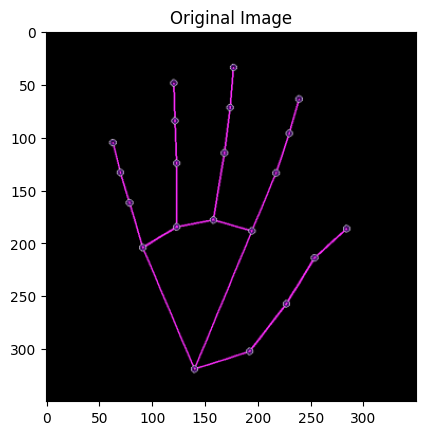

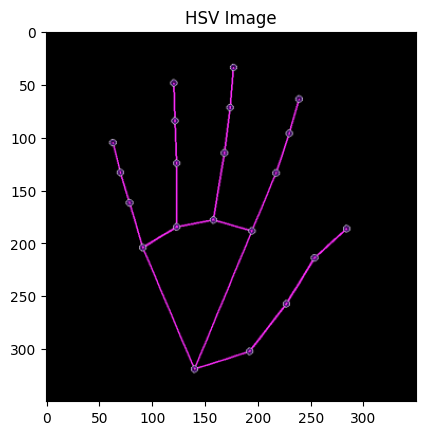

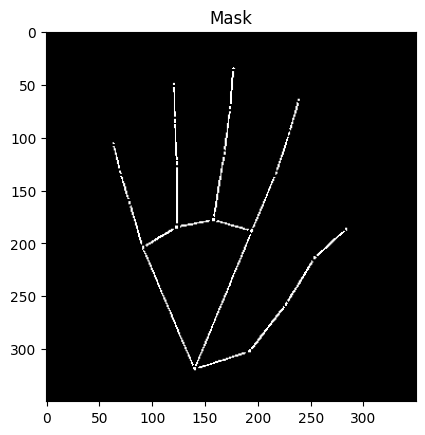

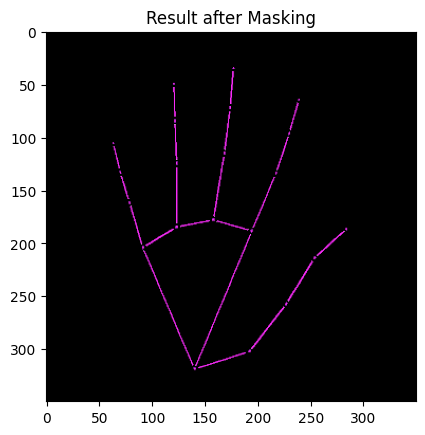

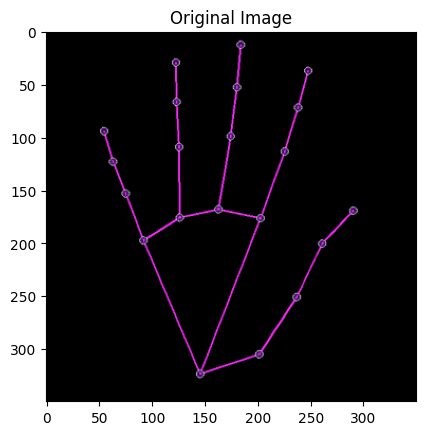

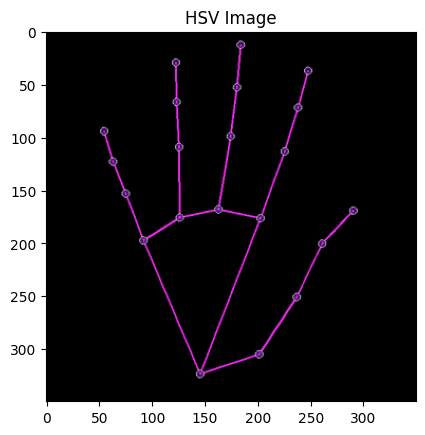

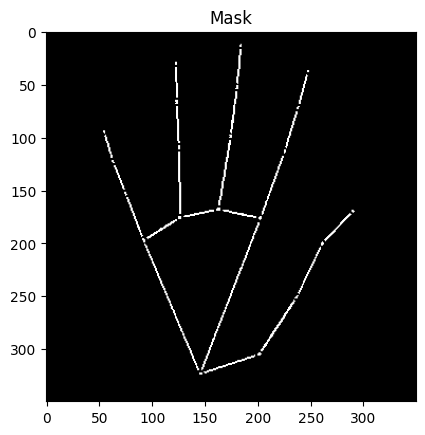

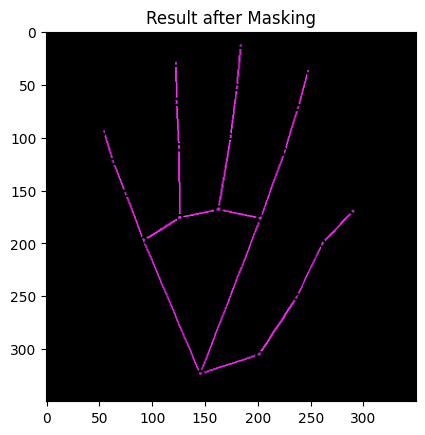

(438, 32)
The gestures are similar.


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

def preprocess_image(image_path, show_steps=True):
    # Load image
    img = cv2.imread(image_path)
    if show_steps:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.show()

    # Convert to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if show_steps:
        plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
        plt.title("HSV Image")
        plt.show()

    # Define pink color range and create mask
    lower_pink = np.array([140, 100, 100])
    upper_pink = np.array([170, 255, 255])
    mask = cv2.inRange(hsv_img, lower_pink, upper_pink)
    if show_steps:
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")
        plt.show()

    # Apply mask
    result = cv2.bitwise_and(img, img, mask=mask)
    if show_steps:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Result after Masking")
        plt.show()

    return result

def match_gestures(image1_path, image2_path, threshold=120, show_preprocess_steps=True):
    img1 = preprocess_image(image1_path, show_steps=show_preprocess_steps)
    img2 = preprocess_image(image2_path, show_steps=show_preprocess_steps)
    
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    print(des2.shape)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    if len(matches) > threshold:
        print("The gestures are similar.")
    else:
        print("The gestures are not similar.")

    return des2

# Example usage (paths need to be valid image paths for actual execution)
image1_path = 'saved_imgs/cropped_hand_23.png'
image2_path = 'base_gestures/start_base.png'
des2 = match_gestures(image1_path, image2_path, show_preprocess_steps=True)

gestures["speed_inc"] = des2.tolist()




In [42]:
for val in gestures:
    print(val, gestures[val])

to_left [[64, 32, 65, 65, 36, 73, 225, 0, 100, 0, 34, 168, 147, 4, 144, 96, 0, 20, 106, 8, 1, 112, 229, 0, 4, 160, 161, 0, 68, 128, 84, 160], [114, 0, 23, 65, 11, 73, 1, 64, 38, 160, 130, 8, 80, 151, 4, 116, 40, 148, 123, 0, 9, 67, 225, 16, 17, 32, 129, 26, 0, 8, 22, 48], [244, 38, 232, 68, 184, 11, 79, 168, 16, 166, 172, 168, 67, 39, 193, 19, 89, 212, 69, 170, 104, 66, 232, 14, 104, 134, 165, 181, 225, 242, 70, 32], [97, 4, 69, 5, 52, 74, 66, 32, 112, 64, 234, 168, 83, 52, 144, 112, 18, 196, 124, 40, 41, 176, 101, 14, 32, 46, 32, 16, 101, 162, 82, 96], [248, 65, 22, 100, 13, 0, 84, 96, 161, 128, 160, 9, 74, 185, 32, 147, 200, 244, 225, 98, 104, 99, 128, 136, 115, 241, 68, 27, 67, 54, 122, 2], [5, 50, 144, 225, 228, 44, 160, 17, 106, 185, 113, 84, 148, 17, 193, 42, 133, 20, 86, 25, 145, 112, 152, 0, 13, 136, 39, 100, 200, 97, 131, 161], [64, 168, 24, 50, 136, 137, 17, 134, 34, 53, 36, 25, 36, 3, 66, 18, 1, 83, 193, 16, 2, 72, 138, 49, 202, 129, 21, 125, 0, 0, 142, 10], [69, 98, 144, 5,

In [45]:
#write binary feature vectors to json
json_object = json.dumps(gestures)

# Write the JSON string to a file
with open("base_gestures.json", "w") as outfile:
    outfile.write(json_object)

In [48]:
#retrieve
with open("base_gestures.json", "r") as infile:
    data = json.load(infile)

# Access the 'speed' key to get the list of descriptors
des2_list = data["speed_inc"]

# Convert the list back into a NumPy array
des2_retrieved = np.array(des2_list)
print(des2_retrieved)

[[118  32 245 ... 112   5  36]
 [ 64  34  49 ... 128  87 161]
 [  0  32  68 ... 128  18 128]
 ...
 [ 64  32   2 ...   4   3 129]
 [104   4  64 ... 164  82   0]
 [ 98  14 109 ... 172  86  92]]
